## 经典的预测房价的问题

In [1]:
data = load('ex1data2.txt');
disp ('     Feets   Bedrooms   Price');
disp(data(1:5, :));

     Feets   Bedrooms   Price
     2104        3   399900
     1600        3   329900
     2400        3   369000
     1416        2   232000
     3000        4   539900


In [2]:
% feature normalize
function [X, mu, sigma] = featureNormalize(X)
    mu = mean(X);
    sigma = std(X);
    n = size(X, 2);
    
    for i = 1:n
        X(:,i) = (X(:, i) - mu(i)) / sigma(i);
    end
end
% compute cost function
function J = computeCost(X, y, theta)
    m = length(y);
    diff = X * theta - y;
    J = diff' * diff / (2 * m);
end

% gradient desent
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(num_iters, 1);
    
    for i = 1:num_iters
        diff = X * theta - y;
        theta = theta - alpha * X' * diff / m;
        J_history(i) = computeCost(X, y, theta);
    end
end  

In [3]:
[m, n] = size(data);

x = data(:, 1:n-1);
y = data(:, n);

[nX, mu, sigma] = featureNormalize(x);

X = [ones(m, 1), nX];
alpha = 0.01;
num_iters = 400;
theta = zeros(n, 1);
computeCost(X, y, theta);
[theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters);
% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

Theta computed from gradient descent: 
 334302.063993 
 100087.116006 
 3673.548451 



Unable to revert mtime: /Library/Fonts


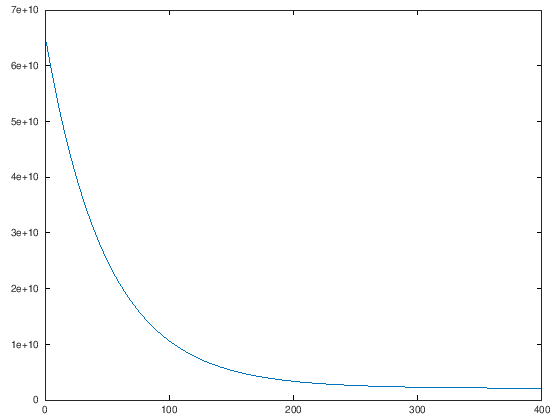

In [4]:
plot(1:400, J_history)

In [5]:
x1 = [1 1650 3];
x1(2) = (x1(2) - mu(1))/sigma(1);
x1(3) = (x1(3) - mu(2))/sigma(2);
price = x1 * theta;
% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289314.620338


### Normal Equations
利用 Noraml Equations 就不需要进行 features scaling 了。

In [6]:
data = load('ex1data2.txt');
[m, n] = size(data);
x = data(:, 1:n-1);
X = [ones(m, 1) x];
y = data(:, n);
theta = pinv(X' * X) * X' * y;


In [7]:
% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

Theta computed from gradient descent: 
 89597.909542 
 139.210674 
 -8738.019112 



In [8]:
x1 = [1 1650 3];
price = x1 * theta;
% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.464335
